## This is MultiClass Classification for Top 5 complaints

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(font_scale=1.1)
np.random.seed(5)

pd.set_option("display.max_rows",10000)
pd.set_option("display.max_columns",100)

import pandas_profiling as pp
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, plot_roc_curve

In [2]:
df = pd.read_csv("train3processed.csv")

In [3]:
df.head()

,lotarea,bldgarea,resarea,numbldgs,numfloors,lotdepth,bldgdepth,builtfar,residfar,year,status,complaint
0,0.000032,0.000168,0.000173,0.003984,0.032258,0.025000,0.040000,0.027553,0.125,0.229008,1.0,0.0
1,0.000025,0.000109,0.000082,0.003984,0.032258,0.027355,0.024615,0.022462,0.075,0.248092,1.0,0.0
2,0.000032,0.000290,0.000196,0.003984,0.048387,0.025000,0.046154,0.047020,0.300,0.312977,1.0,0.0
3,0.000022,0.000125,0.000090,0.003984,0.032258,0.025000,0.025385,0.028452,0.075,0.240458,1.0,0.0
4,0.000039,0.000107,0.000111,0.003984,0.040323,0.023395,0.033077,0.014376,0.075,0.343511,1.0,0.0


In [4]:
df['complaint'].value_counts()

0.0    32061
3.0     4453
2.0     2751
1.0     2062
4.0     1984
Name: complaint, dtype: int64

In [5]:
df.isnull().sum()

lotarea      16
bldgarea     16
resarea      16
numbldgs     16
numfloors    16
lotdepth     16
bldgdepth    16
builtfar     16
residfar     16
year         16
status       16
complaint    16
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.isnull().sum()

lotarea      0
bldgarea     0
resarea      0
numbldgs     0
numfloors    0
lotdepth     0
bldgdepth    0
builtfar     0
residfar     0
year         0
status       0
complaint    0
dtype: int64

### Split data for training

In [8]:
X = df.iloc[:,0:11]
y = df.iloc[:,11]

In [9]:
X.shape, y.shape

((43295, 11), (43295,))

In [10]:
X.head()

,lotarea,bldgarea,resarea,numbldgs,numfloors,lotdepth,bldgdepth,builtfar,residfar,year,status
0,0.000032,0.000168,0.000173,0.003984,0.032258,0.025000,0.040000,0.027553,0.125,0.229008,1.0
1,0.000025,0.000109,0.000082,0.003984,0.032258,0.027355,0.024615,0.022462,0.075,0.248092,1.0
2,0.000032,0.000290,0.000196,0.003984,0.048387,0.025000,0.046154,0.047020,0.300,0.312977,1.0
3,0.000022,0.000125,0.000090,0.003984,0.032258,0.025000,0.025385,0.028452,0.075,0.240458,1.0
4,0.000039,0.000107,0.000111,0.003984,0.040323,0.023395,0.033077,0.014376,0.075,0.343511,1.0


In [11]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: complaint, dtype: float64

In [12]:
X.values, y.values

(array([[3.19192478e-05, 1.68314808e-04, 1.73183792e-04, ...,
         1.25000000e-01, 2.29007634e-01, 1.00000000e+00],
        [2.47811882e-05, 1.09009502e-04, 8.17475940e-05, ...,
         7.50000000e-02, 2.48091603e-01, 1.00000000e+00],
        [3.19192478e-05, 2.89805750e-04, 1.96496994e-04, ...,
         3.00000000e-01, 3.12977099e-01, 1.00000000e+00],
        ...,
        [1.83569345e-05, 1.20013849e-04, 1.23681082e-04, ...,
         3.44000000e-01, 3.81679389e-01, 1.00000000e+00],
        [2.90505559e-05, 2.71859064e-04, 2.79304280e-04, ...,
         1.10000000e-01, 4.19847328e-02, 0.00000000e+00],
        [2.05926286e-05, 1.36409587e-04, 7.80386754e-05, ...,
         7.50000000e-02, 2.67175573e-01, 0.00000000e+00]]),
 array([0., 0., 0., ..., 0., 0., 0.]))

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [14]:
X_train.shape, X_test.shape

((34636, 11), (8659, 11))

### Model 1: KNN Classifier

In [15]:
neigh = KNeighborsClassifier()

In [16]:
neigh.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [17]:
ypred = neigh.predict(X_test)

In [18]:
ypred

array([0., 0., 0., ..., 0., 0., 0.])

In [19]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

         0.0       0.76      0.97      0.86      6386
         1.0       0.14      0.03      0.05       413
         2.0       0.19      0.05      0.08       569
         3.0       0.25      0.07      0.11       910
         4.0       0.13      0.02      0.03       381

    accuracy                           0.73      8659
   macro avg       0.30      0.23      0.22      8659
weighted avg       0.62      0.73      0.65      8659



In [20]:
cm1 = confusion_matrix(y_test,ypred)
cm1

array([[6213,   29,   46,   80,   18],
       [ 357,   12,   14,   26,    4],
       [ 473,   18,   28,   44,    6],
       [ 774,   17,   40,   62,   17],
       [ 305,    9,   23,   37,    7]], dtype=int64)

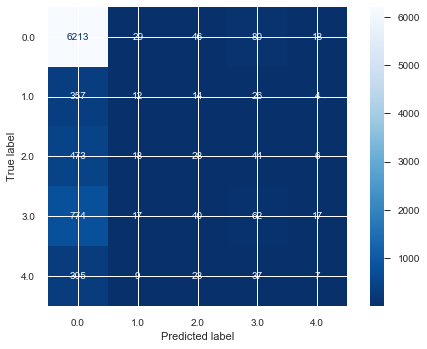

In [21]:
plot_confusion_matrix(neigh,X_test,y_test,values_format='.4g',cmap="Blues_r")
plt.show()

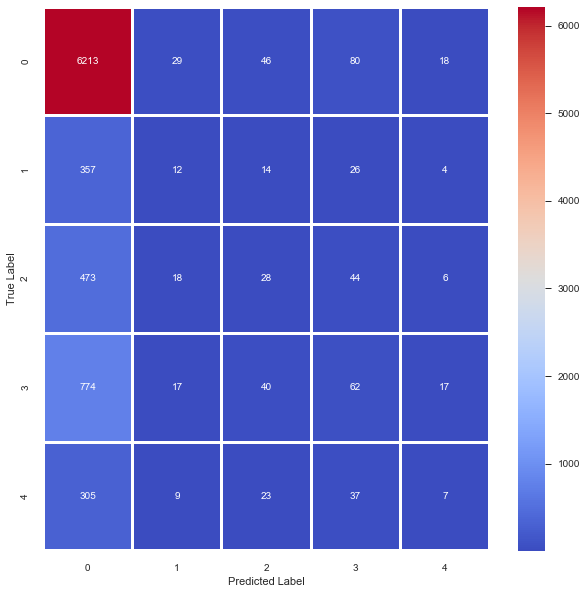

In [22]:
plt.figure(figsize=(10,10))
sns.heatmap(data=cm1, annot=True,cmap="coolwarm",fmt='.4g',linewidths=2)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### Use Random Forest

In [23]:
rf = RandomForestClassifier()

In [24]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [25]:
ypred = rf.predict(X_test)

In [26]:
ypred

array([0., 0., 0., ..., 0., 0., 0.])

In [27]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

         0.0       0.77      0.97      0.86      6386
         1.0       0.12      0.01      0.03       413
         2.0       0.20      0.04      0.07       569
         3.0       0.27      0.10      0.15       910
         4.0       0.15      0.03      0.05       381

    accuracy                           0.73      8659
   macro avg       0.30      0.23      0.23      8659
weighted avg       0.62      0.73      0.66      8659



In [28]:
cm2 = confusion_matrix(y_test,ypred)
cm2

array([[6200,   19,   44,   94,   29],
       [ 352,    6,    9,   43,    3],
       [ 460,    5,   25,   69,   10],
       [ 753,   14,   30,   95,   18],
       [ 298,    7,   18,   47,   11]], dtype=int64)

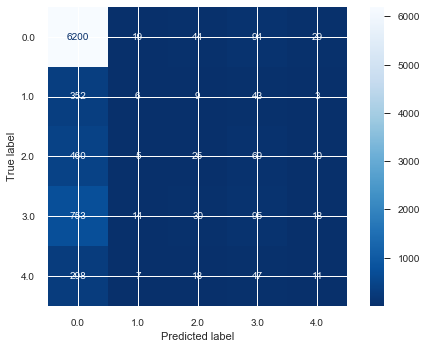

In [29]:
plot_confusion_matrix(rf,X_test,y_test,values_format='.4g',cmap="Blues_r")
plt.show()

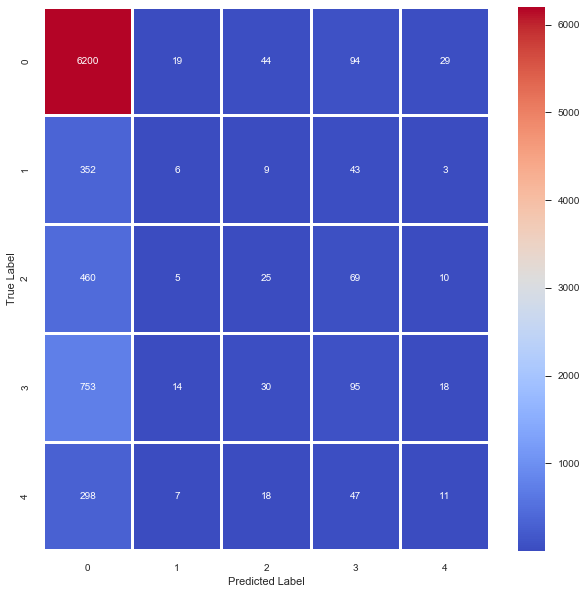

In [30]:
plt.figure(figsize=(10,10))
sns.heatmap(data=cm2, annot=True,cmap="coolwarm",fmt='.4g',linewidths=2)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### Use Gradient Boosting

In [31]:
gb = GradientBoostingClassifier()

In [32]:
gb.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [33]:
ypred = gb.predict(X_test)

In [34]:
ypred

array([0., 0., 0., ..., 0., 0., 0.])

In [35]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

         0.0       0.77      0.99      0.87      6386
         1.0       0.00      0.00      0.00       413
         2.0       0.30      0.01      0.01       569
         3.0       0.32      0.14      0.20       910
         4.0       0.08      0.00      0.01       381

    accuracy                           0.75      8659
   macro avg       0.29      0.23      0.22      8659
weighted avg       0.62      0.75      0.66      8659



In [37]:
cm3 = confusion_matrix(y_test,ypred)
cm3

array([[6326,    1,    2,   55,    2],
       [ 354,    0,    2,   57,    0],
       [ 474,    0,    3,   89,    3],
       [ 769,    5,    1,  129,    6],
       [ 306,    0,    2,   72,    1]], dtype=int64)

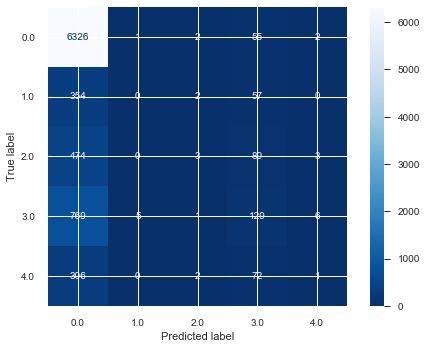

In [38]:
plot_confusion_matrix(gb,X_test,y_test,values_format='.4g',cmap="Blues_r")
plt.show()

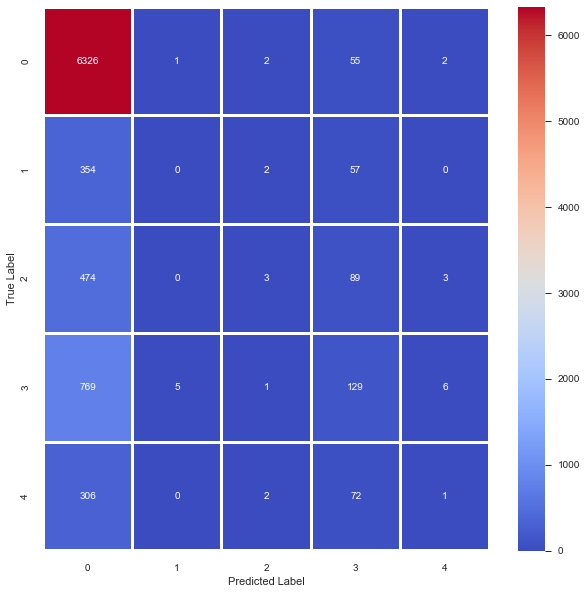

In [39]:
plt.figure(figsize=(10,10))
sns.heatmap(data=cm3, annot=True,cmap="coolwarm",fmt='.4g',linewidths=2)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

**Use Gradient Boosting as it can detect more Heat/Hot water issues**

### Perform cross-validation

In [40]:
gbcv = cross_val_score(gb,X,y,scoring='f1_weighted',cv=5)

In [41]:
gbcv

array([0.67719876, 0.63514876, 0.63657415, 0.69069864, 0.66260062])

In [42]:
gbcv.mean()

0.6604441868157191

### Find Feature Importances

In [43]:
features = gb.feature_importances_
features

array([0.04070262, 0.06638199, 0.0211925 , 0.00719362, 0.00725313,
       0.05934647, 0.03500974, 0.02913936, 0.01613503, 0.03209327,
       0.68555227])

In [44]:
featuresdf = pd.DataFrame(features, columns=["Score"])

In [45]:
featuresdf

,Score
0,0.040703
1,0.066382
2,0.021193
3,0.007194
4,0.007253
5,0.059346
6,0.035010
7,0.029139
8,0.016135
9,0.032093


In [46]:
Xcols = pd.DataFrame(X.columns,columns=['Feature Names'])

In [47]:
Xcols

,Feature Names
0,lotarea
1,bldgarea
2,resarea
3,numbldgs
4,numfloors
5,lotdepth
6,bldgdepth
7,builtfar
8,residfar
9,year


In [48]:
featimpt = pd.concat([Xcols,featuresdf],axis=1)

In [49]:
featimpt

,Feature Names,Score
0,lotarea,0.040703
1,bldgarea,0.066382
2,resarea,0.021193
3,numbldgs,0.007194
4,numfloors,0.007253
5,lotdepth,0.059346
6,bldgdepth,0.035010
7,builtfar,0.029139
8,residfar,0.016135
9,year,0.032093


In [50]:
featimpt.set_index('Feature Names')

,Score
Feature Names,
lotarea,0.040703
bldgarea,0.066382
resarea,0.021193
numbldgs,0.007194
numfloors,0.007253
lotdepth,0.059346
bldgdepth,0.035010
builtfar,0.029139
residfar,0.016135


In [51]:
df = featimpt.set_index('Feature Names')

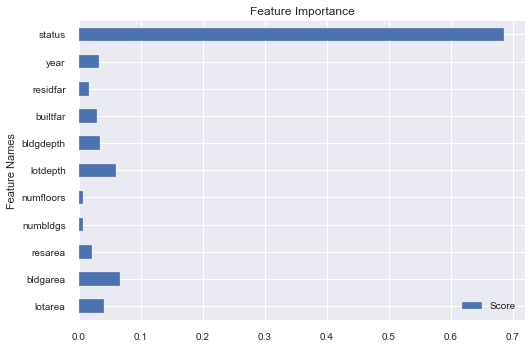

In [52]:
df.plot(kind='barh',title="Feature Importance", legend=True)
plt.show()

### Tips to improve better results
- Use more data to train (500000 to 800000 samples)
- Perform feature engineering to create new columns
- Model tuning using hyperparameter tuning
- Use more powerful algorithms like XGBoost
- Using feature importance to determine which features are more important

### Conclusion

**Can a predictive model be built for future prediction of the possibility of complaints of the specific type that you identified in response to Question 1?**

Yes